In [1]:
import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randint
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("toy_dataset.csv")
print(data)

        Number    City  Gender  Age    Income Illness
0            1  Dallas    Male   41   40367.0      No
1            2  Dallas    Male   54   45084.0      No
2            3  Dallas    Male   42   52483.0      No
3            4  Dallas    Male   40   40941.0      No
4            5  Dallas    Male   46   50289.0      No
...        ...     ...     ...  ...       ...     ...
149995  149996  Austin    Male   48   93669.0      No
149996  149997  Austin    Male   25   96748.0      No
149997  149998  Austin    Male   26  111885.0      No
149998  149999  Austin    Male   25  111878.0      No
149999  150000  Austin  Female   37   87251.0      No

[150000 rows x 6 columns]


In [3]:
dataProcessed= data.copy()

In [4]:
class KMeans:
    
    def __init__(self , _noOfClusters):
        self.K= _noOfClusters
        self.centroids= None
        self.C= None
        self.cost= None
        
        
    def fit(self , X):
        
        #Random Initialization
        seed(1)
        randInd= randint(0 , X.shape[0], self.K)
        
        self.centroids= np.zeros((self.K , X.shape[1]))
        
        for count in range(0 , self.K):
            
            self.centroids[count]= X[randInd[count] , :]
        
        
        #Assign points to centroids
        self.C= np.zeros((X.shape[0] , 1) , dtype=int)
        differences= np.zeros((self.K))
        
        
        for count in range(0 , X.shape[0]):
            
            for centroidInd in range(0 , self.K):
                
                differences[centroidInd]= np.sqrt(np.sum((X[count , :] - self.centroids[centroidInd , :]) ** 2 , axis=0))
 
                    
            self.C[count]= np.argmin(differences)
        
            
        #Update centroids
        for centroidNo in range(0 , self.K):
                        
            ind= self.C == centroidNo 
            pointsAssigned= X[ind[: , 0] , :]
            self.centroids[centroidNo]= np.sum(pointsAssigned , axis=0) / len(ind)
            
        cost= self.calculateCost(X)
        
        return self.centroids , cost 
                                                                                                                                                                    
    
    def calculateCost(self , X):
        
        cost= 0.0
        m= X.shape[0]
        
        for exampleNo in range(0 , m):
            
            ind= self.C[exampleNo , 0]
            cost+= np.sqrt(np.sum((X[exampleNo , :] - self.centroids[ind , :]) ** 2 , axis=0))
                
        cost/= m
        
        self.cost= cost
        
        return cost
    
    def classify(self , data):
        
        labels= self.C
        
        data["labels"]= labels.flatten().tolist()
        
        return

In [5]:
dataProcessed= dataProcessed.replace(to_replace="Male" , value=1)
dataProcessed= dataProcessed.replace(to_replace="Female" , value=0)

dataProcessed= dataProcessed.replace(to_replace="Yes" , value=1)
dataProcessed= dataProcessed.replace(to_replace="No" , value=0)

dataProcessed['City']= 0

In [6]:
X= dataProcessed[["City" , "Gender" , "Age" , "Income" , "Illness"]].to_numpy()
print(X)
print(X.shape)

[[0.00000e+00 1.00000e+00 4.10000e+01 4.03670e+04 0.00000e+00]
 [0.00000e+00 1.00000e+00 5.40000e+01 4.50840e+04 0.00000e+00]
 [0.00000e+00 1.00000e+00 4.20000e+01 5.24830e+04 0.00000e+00]
 ...
 [0.00000e+00 1.00000e+00 2.60000e+01 1.11885e+05 0.00000e+00]
 [0.00000e+00 1.00000e+00 2.50000e+01 1.11878e+05 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.70000e+01 8.72510e+04 0.00000e+00]]
(150000, 5)


In [7]:
kmeans= KMeans(3)
centroids, cost= kmeans.fit(X)
print(centroids , cost)
kmeans.classify(data)

print(data)


[[0.00000000e+00 7.79866667e-02 9.65390667e+00 1.66488748e+04
  1.75133333e-02]
 [0.00000000e+00 6.18866667e-02 5.63488667e+00 5.45305133e+03
  1.01800000e-02]
 [0.00000000e+00 4.18793333e-01 2.96614067e+01 6.91508722e+04
  5.32333333e-02]] 41361.87168117395
        Number    City  Gender  Age    Income Illness  labels
0            1  Dallas    Male   41   40367.0      No       1
1            2  Dallas    Male   54   45084.0      No       1
2            3  Dallas    Male   42   52483.0      No       1
3            4  Dallas    Male   40   40941.0      No       1
4            5  Dallas    Male   46   50289.0      No       1
...        ...     ...     ...  ...       ...     ...     ...
149995  149996  Austin    Male   48   93669.0      No       2
149996  149997  Austin    Male   25   96748.0      No       2
149997  149998  Austin    Male   26  111885.0      No       2
149998  149999  Austin    Male   25  111878.0      No       2
149999  150000  Austin  Female   37   87251.0      No      

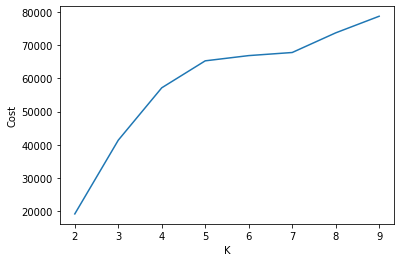

In [14]:
cost= []

for k in range(2 , 10):
    kmeans= KMeans(k)
    centroids , kCost= kmeans.fit(X)
    cost.append(kCost)


kValues= range(2 , 10)

plt.plot(kValues , cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

In [ ]:
kmeans= KMeans(3)
centroids, cost= kmeans.fit(X)
print(centroids , cost)
kmeans.classify(data)

print(data)

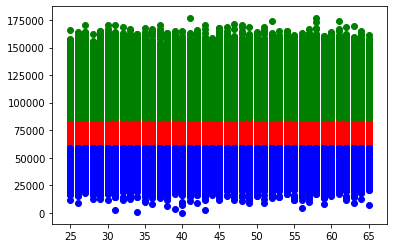

In [10]:
cluster0= data.loc[lambda df: df['labels'] == 0, :]
cluster1= data.loc[lambda df: df['labels'] == 1, :]
cluster2= data.loc[lambda df: df['labels'] == 2, :]

plt.scatter(cluster0.iloc[: , 3], cluster0.iloc[: , 4], color= 'red')
plt.scatter(cluster1.iloc[: , 3], cluster1.iloc[: , 4], color= 'blue')
plt.scatter(cluster2.iloc[: , 3], cluster2.iloc[: , 4], color= 'green')

plt.show()

In [7]:
kproto=KPrototypes(n_clusters=2)
clusters= kproto.fit_predict(dataProcessed , categorical=[1,2,5]) 

labels= pd.DataFrame(clusters)
labeledData= pd.concat((data,labels) , axis=1)
labeledData= labeledData.rename({0: 'labels'} , axis=1)

In [5]:
print(labeledData)

        Number    City  Gender  Age    Income Illness  labels
0            1  Dallas    Male   41   40367.0      No       0
1            2  Dallas    Male   54   45084.0      No       0
2            3  Dallas    Male   42   52483.0      No       0
3            4  Dallas    Male   40   40941.0      No       0
4            5  Dallas    Male   46   50289.0      No       0
...        ...     ...     ...  ...       ...     ...     ...
149995  149996  Austin    Male   48   93669.0      No       1
149996  149997  Austin    Male   25   96748.0      No       1
149997  149998  Austin    Male   26  111885.0      No       1
149998  149999  Austin    Male   25  111878.0      No       1
149999  150000  Austin  Female   37   87251.0      No       1

[150000 rows x 7 columns]


Text(0, 0.5, 'Income')

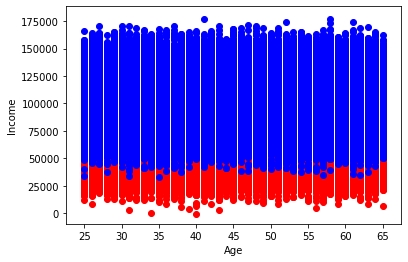

In [10]:
label0Age= labeledData.loc[lambda labeledData: labeledData['labels'] == 0 , 'Age']
label0Income= labeledData.loc[lambda labeledData: labeledData['labels'] == 0 , 'Income']

label1Age= labeledData.loc[lambda labeledData: labeledData['labels'] == 1 , 'Age']
label1Income= labeledData.loc[lambda labeledData: labeledData['labels'] == 1 , 'Income']

plt.scatter(label0Age , label0Income, color='red')
plt.scatter(label1Age, label1Income, color= 'blue')
plt.xlabel("Age")
plt.ylabel("Income")
#plt.scatter()